In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os
import glob
import subprocess

In [2]:
# установка
m_plat = 1.0947
k_ust = 3.9 * 10 ** (-4)
i_plat_th = 8.31 * 10 ** (-3)

def i(m, t):
    return k_ust * m * t ** 2


In [63]:
# платформа с бруском
m_brus = 0.7065
a = 20 * 10 ** (-3) 
b = a
c = 212.5 * 10 ** (-3)

t_3 = [19.496, 18.623, 18.635, 18.517, 18.563, 18.552, 18.533] 
t_av_3 = sum(t_3) / len(t_3) / 5

i_brus_plat_exp = i(m_brus + m_plat, t_av_3)
i_brus_th = 1/12 * m_brus * (a ** 2 + c ** 2)
i_brus_plat_th = i_plat_th + i_brus_th

print("Момент инерции с бруском(эксперимент): {}".format(i_brus_plat_exp))
print("Момент инерции с бруском(теория): {}".format(i_brus_th + i_plat_th))
print("Момент инерции бруска(теория): {}".format(i_brus_th))
print("Отклонение: {}%".format((
    (i_brus_th + i_plat_th) - i_brus_plat_exp) / max(i_brus_th + i_plat_th, i_brus_plat_exp) * 100))

print("\n")

Момент инерции с бруском(эксперимент): 0.009828694025303304
Момент инерции с бруском(теория): 0.010992124218750001
Момент инерции бруска(теория): 0.0026821242187499996
Отклонение: 10.5842162105679%




In [64]:
# цилиндр 
m_cil = 0.5653 + 0.5664
r_cil = 4.15 * 10 ** (-2) # 4.15 см
i_cil = m_cil * r_cil ** 2 / 2

h = [8, 7, 7.5, 5, 4, 3, 1, 0]
t_cil = [[20.302, 20.67, 20.177],
         [19.718, 19.672, 19.744],
         [19.691, 19.842, 20.053],
         [17.914, 17.908, 17.840],
         [16.740, 16.097, 16.740],
         [16.632, 15.632, 15.564],
         [15.626, 15.621, 15.603],
         [15.421, 15.441, 15.459]]

t_cil = np.array(t_cil)
t_mean = t_cil.mean(axis=1) / 5

print('========Цилиндр=========\nСредние времена:\n{}'.format('\n'.join(map(str, t_mean))))

========Цилиндр=========
Средние времена:
4.0766
3.94226666667
3.9724
3.57746666667
3.30513333333
3.18853333333
3.12333333333
3.08806666667


[ 16.61866756  15.54146647  15.77996176  12.79826775  10.92390635
  10.16674482   9.75521111   9.53615574]


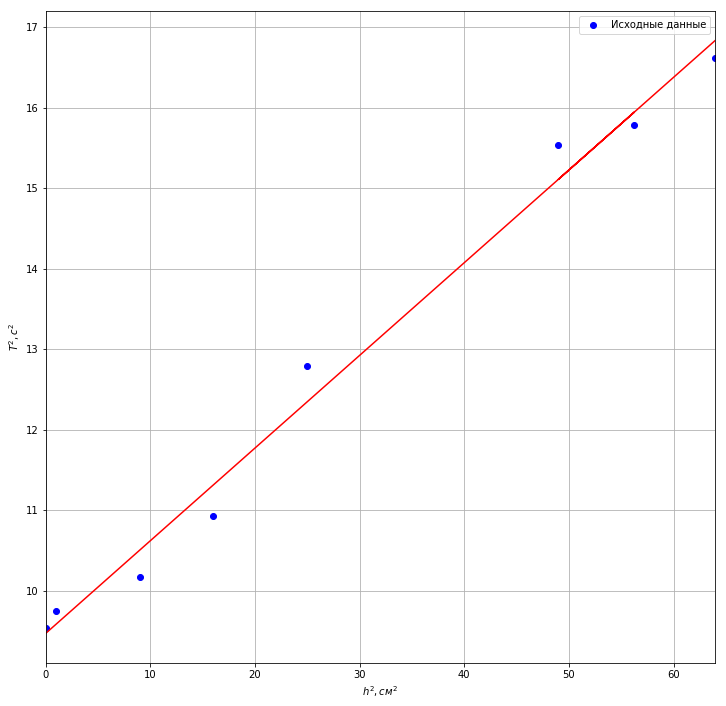

In [70]:
x = np.array(h) ** 2
y = t_mean ** 2
print(y)
err_x = 2 * 0.05
err_y = 2 * 0.01

A = np.vstack([x, np.ones(len(x))]).T

k_best, b_best = np.linalg.lstsq(A, y)[0]

plt.figure(figsize=(12, 12))
# plt.figure().gca().set_xticks(np.arange(0,1,0.1))
# plt.figure().gca().set_yticks(np.arange(0,1.,0.1))

plt.xlim(np.min(x), np.max(x))
plt.plot(x, k_best * x + b_best, 'r')
plt.scatter(x,y, color='blue', label='Исходные данные')

plt.xlabel('$h^2, см^2$')
plt.ylabel('$T^2, с^2$')
plt.grid()
plt.legend()
plt.show()

In [66]:
k_best = 0.13
b_best = 9.47
print("Пересечение с осью ординат: {}".format(b_best))
print("Коэффициент наклона: {}".format(k_best))

Пересечение с осью ординат: 9.47
Коэффициент наклона: 0.13


In [67]:
K_ust = m_cil / ((m_cil + m_plat) * k_best)
print("Коэффициент установки: {}".format(K_ust))

Коэффициент установки: 3.9100721412974373


In [69]:
i_cil = m_cil * r_cil ** 2 / 2
i_plat = i_plat_th
T_prac = (i_plat + i_cil) / ((m_plat + m_cil) * K_ust)
print("Получившееся T^2: {}".format(T_prac))

Получившееся T^2: 0.0010665278528982948
